# Masterthesis: Classification of defects on Typenschilder
## Kapitel 3:  DATA IMBALANCE EXKURS

Autor:   Ayse Alemdar

Date:    04.06.2021

Inhalt:  Code zum Exkurs, Masterarbeit Kapitel 3 


## 1 Data Imbalance Exkurs

In diesem Abschnitt werden drei unerschidliche Vorgehensweisen getestet, um das Problem der imbalaced Data zu lösen. Die Methoden werden verglichen und der Gewinner wird als passende Oversampling Methode im weiteren Code verwendet.
    
    1-SMOTE: Hier wird die Minority Klasse anhand synthetische Erstellung von Bilder auf die Anzahl der Majority Klasse erhöht.
    2-Class-weight: Hier werden die zwei Klassen gewichtet, so dass die kleinere Klasse eine höhere Gewichtung bekommt und so das Modell nicht immer die Majority Klasse wählt.
    3-Data-Image-Generator: Anhand von uns festgelegten Funktionen werden die Bilder vermehrt. Beispiel Rotation, Drehung, Ziehung, Zoom usw.


### Import Libraries

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Input, Conv2DTranspose
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img,img_to_array, load_img
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.models import load_model, Model
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras import backend as K
from collections import Counter
import keras.metrics as km
from keras import metrics
from numpy import where
import seaborn as sns
import numpy as np
import glob as gb
import itertools
#nur wenn ML Azure im Einsatz
import azureml.core
from azureml.core import Experiment
#nur wenn ML Azure im Einsatz
import random
import keras
import tensorflow as tf
import pickle
import cv2
import os

Using TensorFlow backend.


### Funktionen

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Data Load

Es werden zwei unterschiedliche Datensätze getestet. Einmal mit der gesamten vorhandenen Daten und einmal weniger also mit Undersampled Daten

    basedata_binary_v1: 457 Defekt, 1500 Korrekt
    basedata_binary_v7: 457 Defekt, 7653

In [ ]:
sourcelink='/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/basedata_binary_cleaned_Data_ImbalancedDSProblems/'

In [ ]:
for folder in  os.listdir(sourcelink) : 
    files = gb.glob(pathname= str( sourcelink+ folder + '/*.bmp'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 377 in folder defect
For training data , found 2234 in folder nondefect


In [ ]:
batch_size = 240
num_classes = 2
epochs = 100

# input image dimensions. Originalgrösse = 256
img_size=150
input_shape = (img_size, img_size, 1)

In [ ]:
code = {'defect':0 ,'nondefect':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x  

In [ ]:
X_all = []
y_all = [] 
for folder in  os.listdir(sourcelink) : 
    files = gb.glob(pathname= str( sourcelink +'/' + folder + '/*.bmp'))
    for file in files: 
        image = cv2.imread(file)
        image_gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print(file)
        image_array = cv2.resize(image_gray , (img_size,img_size))
        X_all.append(list(image_array))
        y_all.append(code[folder])

/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/basedata_binary_cleaned_Data_ImbalancedDSProblems//defect/Image1000.bmp
/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/basedata_binary_cleaned_Data_ImbalancedDSProblems//defect/Image1015.bmp
/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/basedata_binary_cleaned_Data_ImbalancedDSProblems//defect/Image1057.bmp
/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/basedata_binary_cleaned_Data_ImbalancedDSProblems//defect/Image1114.bmp
/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/basedata_binary_cleaned_Data_ImbalancedDSProblems//defect/Image1164.bmp
/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/basedata_binary_cleaned_Data_ImbalancedDSProblems//defect/Image120034.bmp
/m

In [ ]:
X_all=np.load('/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/Desktop/02_transform_DataImbalance/X_all_SMOTE.npy')
y_all=np.load('/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/Desktop/02_transform_DataImbalance/y_all_SMOTE.npy')

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [ ]:
y_train_orig = y_train
y_test_orig = y_test
X_train_orig =X_train
X_test_orig=X_test

In [ ]:
#list to array
X_train = np.array(X_train)
X_test = np.array(X_test)

#reshape so dass Farbkanal am Ende steht
X_train=X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_test=X_test.reshape(X_test.shape[0], img_size, img_size, 1)
input_shape = (img_size, img_size, 1)    

#Normalization [0,1] by dividing in 255pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(len(X_train))
print(len(X_test))

2088
523


## 1- Original Model mit Ungeleichverteilten Daten

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
              batch_size=batch_size, 
              epochs=100, #epochs,
              validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 7s 835ms/step - loss: 0.4058 - accuracy: 0.8549 - val_loss: 0.3936 - val_accuracy: 0.8585
Epoch 2/100
9/9 [==============================] - 8s 835ms/step - loss: 0.3868 - accuracy: 0.8549 - val_loss: 0.3805 - val_accuracy: 0.8585
Epoch 3/100
9/9 [==============================] - 7s 833ms/step - loss: 0.3777 - accuracy: 0.8549 - val_loss: 0.3751 - val_accuracy: 0.8585
Epoch 4/100
9/9 [==============================] - 8s 836ms/step - loss: 0.3707 - accuracy: 0.8549 - val_loss: 0.3885 - val_accuracy: 0.8585
Epoch 5/100
9/9 [==============================] - 8s 835ms/step - loss: 0.3753 - accuracy: 0.8549 - val_loss: 0.3750 - val_accuracy: 0.8585
Epoch 6/100
9/9 [==============================] - 8s 840ms/step - loss: 0.3792 - accuracy: 0.8549 - val_loss: 0.4014 - val_accuracy: 0

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


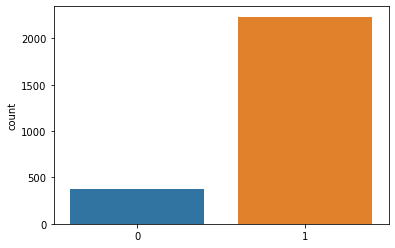

In [ ]:
#Eine Grafik zur Verteilung von Daten
f = sns.countplot(y_all)

In [ ]:
predicted_classes = model.predict_classes(X_test)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

17/17 [==============================] - 0s 19ms/step - loss: 1.0427 - accuracy: 0.7916
Test Loss is 1.0427225828170776
Test Accuracy is 0.7915869951248169


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


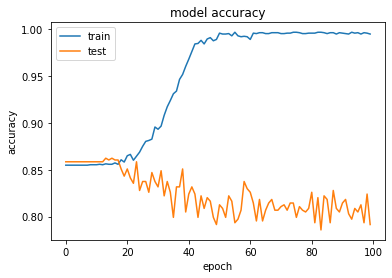

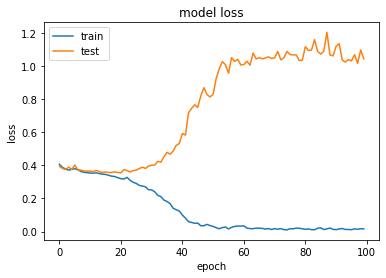

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predicted_classes = model.predict_classes(X_test)

Confusion matrix, without normalization
[[ 27  47]
 [ 62 387]]


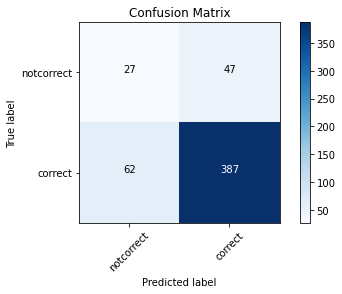

In [ ]:
confmat = confusion_matrix(y_test_orig,predicted_classes)
cm_plot_labels=['notcorrect','correct']
plot_confusion_matrix(confmat,cm_plot_labels,title='Confusion Matrix')

In [ ]:
print(classification_report(y_test_orig, predicted_classes))

              precision    recall  f1-score   support

           0       0.30      0.36      0.33        74
           1       0.89      0.86      0.88       449

    accuracy                           0.79       523
   macro avg       0.60      0.61      0.60       523
weighted avg       0.81      0.79      0.80       523



# 2- SMOTE für oversampling nutzen

Die Daten müssen in Arrays gewandelt werden und das Format muss sich auch ändern, damit das SMOTE angewendet werden kann. 

Source: https://medium.com/swlh/how-to-use-smote-for-dealing-with-imbalanced-image-dataset-for-solving-classification-problems-3aba7d2b9cad

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#list to array
X_train = X_train_orig
X_test=X_test_orig
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
y_train = y_train_orig
y_test=y_test_orig

In [ ]:
#shape muss so angepasst werden für SMOTE und später bevor Model ausgeführt wird, nochmal shape zurückstellen
X_train=X_train.reshape(2088,150,150)
X_train = X_train.transpose(0,1,2).reshape(2088,-1)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


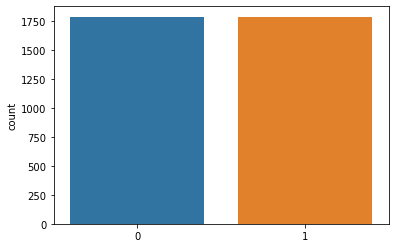

In [ ]:
f = sns.countplot(y_train)

In [ ]:
y_train.shape

(3570,)

In [ ]:
img_size=150

#shape wieder zurückstellen so dass es wie vor SMOTE war und Normalization machen
X_train=X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_test=X_test.reshape(X_test.shape[0], img_size, img_size, 1)
input_shape = (img_size, img_size, 1) 

#Normalization [0,1] by dividing in 255pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
checkpoint_filepath='./SMOTE'
tl_model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)
callbacks=[tl_model_checkpoint_callback]

In [ ]:
history = model.fit(X_train, y_train,
              batch_size=batch_size, 
              epochs=100, #epochs,
              validation_data=(X_test, y_test)
              ,callbacks=callbacks
              )

Epoch 1/100
15/15 [==============================] - 14s 863ms/step - loss: 0.6711 - accuracy: 0.5445 - val_loss: 0.6125 - val_accuracy: 0.7648
INFO:tensorflow:Assets written to: ./SMOTE/assets
Epoch 2/100
15/15 [==============================] - 13s 864ms/step - loss: 0.4695 - accuracy: 0.7991 - val_loss: 0.4537 - val_accuracy: 0.8088
INFO:tensorflow:Assets written to: ./SMOTE/assets
Epoch 3/100
15/15 [==============================] - 13s 846ms/step - loss: 0.3532 - accuracy: 0.8392 - val_loss: 0.4132 - val_accuracy: 0.8451
INFO:tensorflow:Assets written to: ./SMOTE/assets
Epoch 4/100
15/15 [==============================] - 13s 844ms/step - loss: 0.3137 - accuracy: 0.8603 - val_loss: 0.3980 - val_accuracy: 0.8509
INFO:tensorflow:Assets written to: ./SMOTE/assets
Epoch 5/100
15/15 [==============================] - 13s 846ms/step - loss: 0.3002 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


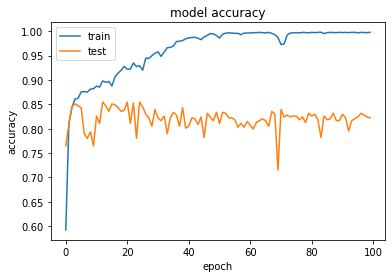

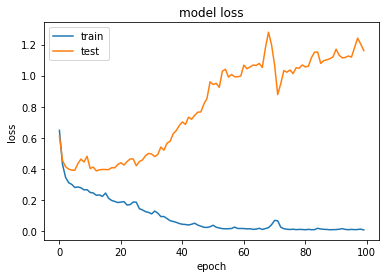

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predicted_classes = model.predict_classes(X_test)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization
[[ 18  56]
 [ 37 412]]


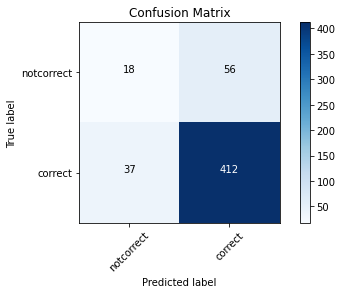

In [ ]:
confmat = confusion_matrix(y_test_orig,predicted_classes)
cm_plot_labels=['notcorrect','correct']
plot_confusion_matrix(confmat,cm_plot_labels,title='Confusion Matrix')

In [ ]:
#SMOTE DSv7
print(classification_report(y_test_orig, predicted_classes))

              precision    recall  f1-score   support

           0       0.33      0.24      0.28        74
           1       0.88      0.92      0.90       449

    accuracy                           0.82       523
   macro avg       0.60      0.58      0.59       523
weighted avg       0.80      0.82      0.81       523



# 3- Class_weight für Oversampling nutzen

In [ ]:
class_weight = {0: 6.,
                1: 1.}

In [ ]:
checkpoint_filepath='./CLASSWEIGHT'
tl_model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)
callbacks=[tl_model_checkpoint_callback]

In [ ]:
history = model.fit(X_train, y_train,
              batch_size=batch_size, 
              class_weight=class_weight,              
              epochs=100, #epochs,
              validation_data=(X_test, y_test),
              callbacks=callbacks)

Epoch 1/100
9/9 [==============================] - 9s 877ms/step - loss: 1.1742 - accuracy: 0.5610 - val_loss: 0.7254 - val_accuracy: 0.2753
INFO:tensorflow:Assets written to: ./CLASSWEIGHT/assets
Epoch 2/100
9/9 [==============================] - 8s 850ms/step - loss: 1.1448 - accuracy: 0.4370 - val_loss: 0.7257 - val_accuracy: 0.5507
INFO:tensorflow:Assets written to: ./CLASSWEIGHT/assets
Epoch 3/100
9/9 [==============================] - 8s 845ms/step - loss: 1.0977 - accuracy: 0.5973 - val_loss: 0.6570 - val_accuracy: 0.6061
INFO:tensorflow:Assets written to: ./CLASSWEIGHT/assets
Epoch 4/100
9/9 [==============================] - 8s 836ms/step - loss: 1.0314 - accuracy: 0.6617 - val_loss: 0.7080 - val_accuracy: 0.5507
INFO:tensorflow:Assets written to: ./CLASSWEIGHT/assets
Epoch 5/100
9/9 [==============================] - 8s 847ms/step - loss: 1.0346 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


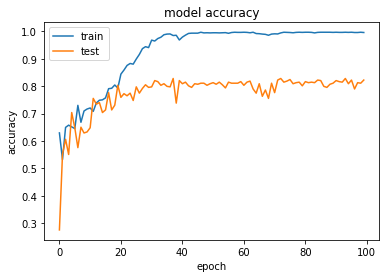

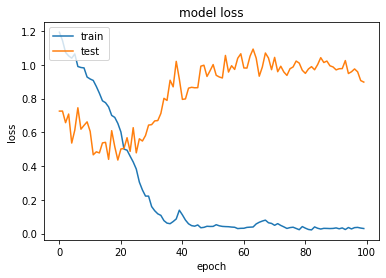

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predicted_classes = model.predict_classes(X_test)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization
[[ 27  47]
 [ 46 403]]


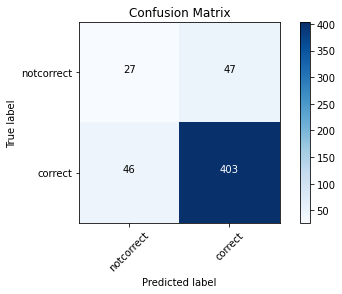

In [ ]:
confmat = confusion_matrix(y_test_orig,predicted_classes)
cm_plot_labels=['notcorrect','correct']
plot_confusion_matrix(confmat,cm_plot_labels,title='Confusion Matrix')

In [ ]:
print(classification_report(y_test_orig, predicted_classes))

              precision    recall  f1-score   support

           0       0.37      0.36      0.37        74
           1       0.90      0.90      0.90       449

    accuracy                           0.82       523
   macro avg       0.63      0.63      0.63       523
weighted avg       0.82      0.82      0.82       523



# 4- Imagedatageneration für Oversampling

ImageDataGeneration wurde in einem separaten Jupyter Notebook verwendet, augmentiert und abgespeichert. Hier werden nur die Daten-Files eingelesen. Die Vermehrung der Daten der Klasse "defect" wurden nur
bei den Trainingsdaten durchgeführt.

In [ ]:
batch_size = 240
num_classes = 2
epochs = 11

# input image dimensions. Originalgrösse = 256
img_size=150
input_shape = (img_size, img_size, 1)

In [ ]:
X_train=np.load('/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/Typenschilder/02_transform/X_train_DataImbalance_ImgDataGenerator.npy')
X_test=np.load('/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/Typenschilder/02_transform/X_test_DataImbalance_ImgDataGenerator.npy')
y_train=np.load('/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/Typenschilder/02_transform/y_train_DataImbalance_ImgDataGenerator.npy')
y_test=np.load('/mnt/batch/tasks/shared/LS_root/mounts/clusters/deeplearning-invision/code/Users/Ayse.Alemdar/Typenschilder/02_transform/y_test_DataImbalance_ImgDataGenerator.npy')

In [ ]:
#Original Shape etc. der Bilder nach train/test split
X_train_orig =X_train
X_test_orig= X_test

#Bilder in Array
X_train = np.array(X_train)
X_test = np.array(X_test)

#reshape so dass Farbkanal am Ende steht
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)

#Normalization [0,1] by dividing in 255pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
# in evaluation take this orig version
y_train_orig = y_train
y_test_orig = y_test

y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
              batch_size=batch_size, 
              epochs=100, #epochs,
              #verbose=verbosity,
              validation_data=(X_test, y_test),
              #validation_split=validation_split,
              #callbacks=model_checkpoint_callback
              )

Epoch 1/100
11/11 [==============================] - 9s 797ms/step - loss: 0.2314 - accuracy: 0.9387 - val_loss: 0.7209 - val_accuracy: 0.8585
Epoch 2/100
11/11 [==============================] - 9s 780ms/step - loss: 0.2313 - accuracy: 0.9387 - val_loss: 0.8185 - val_accuracy: 0.8585
Epoch 3/100
11/11 [==============================] - 9s 782ms/step - loss: 0.2327 - accuracy: 0.9387 - val_loss: 0.6835 - val_accuracy: 0.8585
Epoch 4/100
11/11 [==============================] - 9s 783ms/step - loss: 0.2331 - accuracy: 0.9387 - val_loss: 0.8400 - val_accuracy: 0.8585
Epoch 5/100
11/11 [==============================] - 9s 779ms/step - loss: 0.2345 - accuracy: 0.9387 - val_loss: 0.6845 - val_accuracy: 0.8585
Epoch 6/100
11/11 [==============================] - 9s 790ms/step - loss: 0.2316 - accuracy: 0.9387 - val_loss: 0.

In [ ]:
#make prediction
predicted_classes = model.predict_classes(X_test)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Ergebnisse dieses Models

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

17/17 [==============================] - 0s 22ms/step - loss: 0.9867 - accuracy: 0.8757
Test Loss is 0.9866840839385986
Test Accuracy is 0.875717043876648


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


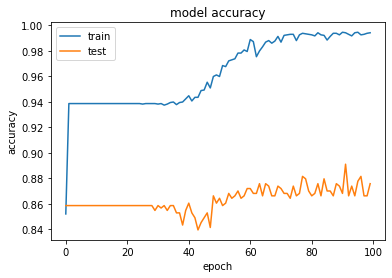

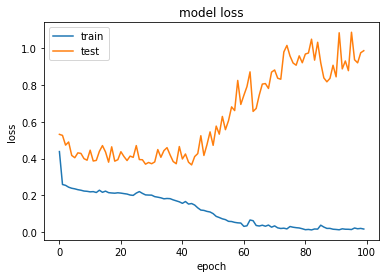

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[ 23  51]
 [ 14 435]]


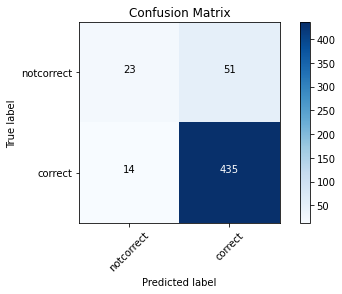

In [ ]:
confmat = confusion_matrix(y_test_orig,predicted_classes)
cm_plot_labels=['notcorrect','correct']
plot_confusion_matrix(confmat,cm_plot_labels,title='Confusion Matrix')

In [ ]:
print(classification_report(y_test_orig, predicted_classes))

              precision    recall  f1-score   support

           0       0.62      0.31      0.41        74
           1       0.90      0.97      0.93       449

    accuracy                           0.88       523
   macro avg       0.76      0.64      0.67       523
weighted avg       0.86      0.88      0.86       523

